# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 3. Calculate and print R-squared for both the training and the testing set.

In [6]:
from sklearn.metrics import r2_score
predictions=model.predict(X_test)

r2_score(y_test,predictions)

0.574612696898588

## 4. Calculate and print mean squared error for both the training and the testing set.

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

24.0230520476216

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [8]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

3.5489673377982722

## Classification Model Evaluation

In [9]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_predicted=model.predict(X_train)
predictions=model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [22]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_train,y_train_predicted)

0.9833333333333333

In [18]:
accuracy_score(y_test,predictions)

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [25]:
from sklearn.metrics import balanced_accuracy_score

In [26]:
balanced_accuracy_score(y_train,y_train_predicted)

0.981981981981982

In [27]:
balanced_accuracy_score(y_test,predictions)

0.9487179487179488

## 10. Calculate and print the precision score for both the training and the testing set.

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
precision_score(y_train,y_train_predicted,average="weighted")

0.9833333333333333

In [33]:
precision_score(y_test,predictions,average="weighted")

0.9422222222222222

## 11. Calculate and print the recall score for both the training and the testing set.

In [35]:
recall_score(y_train,y_train_predicted,average="weighted")

0.9833333333333333

In [36]:
recall_score(y_test,predictions,average="weighted")

0.9333333333333333

## 12. Calculate and print the F1 score for both the training and the testing set.

In [38]:
f1_score(y_train,y_train_predicted,average="weighted")

0.9833333333333333

In [37]:
f1_score(y_test,predictions,average="weighted")

0.932936507936508

## 13. Generate confusion matrices for both the training and the testing set.

In [39]:
from sklearn.metrics import plot_confusion_matrix

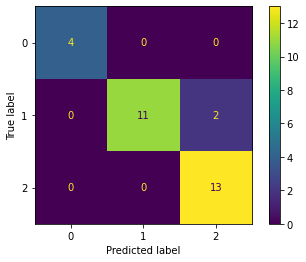

In [41]:
plot_confusion_matrix(model,X_test,y_test);

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.